In [73]:
import numpy as np
import matplotlib.pyplot as plt
import napari
import tifffile
import potrace

from skimage import io
from pathlib import Path
from PIL import Image
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import watershed, expand_labels
from skimage.color import label2rgb

# sélection de l'image

fold_im = "/home/vladimir/Documents/Projets/segmentation/"
name_im = "2D 4C 1 _ 30.06.21 _ copie _ "

channel_im = ["dapi.tif","vert.tif","rouge.tif","rl.tif"]

path_im = []
for i in range (0,4):
    path_im.append(fold_im + "/" + name_im + channel_im[i])

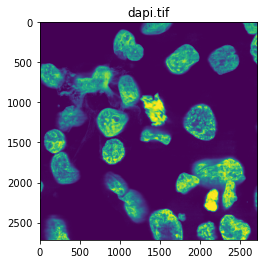

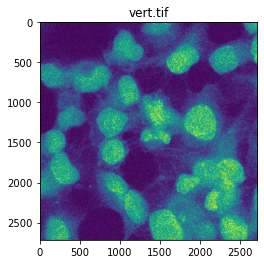

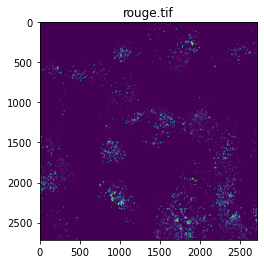

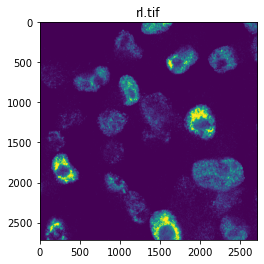

In [61]:
# affichage de l'image avec son titre

im = []
for i in range (0,4):
    im.append(np.array(Image.open(path_im[i])))
    plt.imshow(im[i])
    plt.title(channel_im[i])
    plt.show()

In [60]:
# conversion en 16 bit

im_16 = []
for i in range (0,4):
    im_16.append(im[i].astype(np.uint16))

In [95]:
# sauvegarde du mask en fonction du nom de l'image d'origine

for i in range (0,4):
        a = str(i)

        if Path(fold_im + '/processed').exists() :
            tifffile.imwrite(fold_im + '/processed/' + name_im + channel_im[i] + '_mask_cells.tiff', viewer.layers['mask '+a].data)
        else :
            new_fold = Path(fold_im + '/processed')
            new_fold.mkdir()
            tifffile.imwrite(fold_im + '/processed/' + name_im + '_mask_cells.tiff', viewer.layers['mask '+a].data)

Reader will load image in-memory: False


In [65]:
# conversion en nuances de gris

im_gray = []
for i in range (0,4):
    im_gray.append(rgb2gray(im_16[i]))

<ipython-input-65-a3ec5e3014b9>:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  im_gray.append(rgb2gray(im_16[i]))


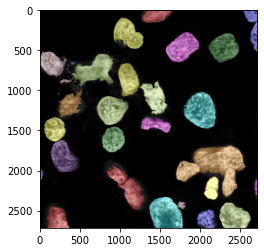

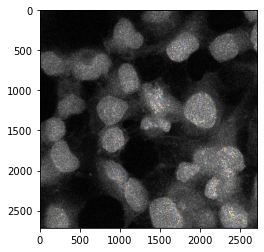

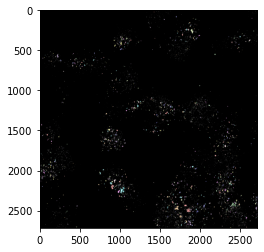

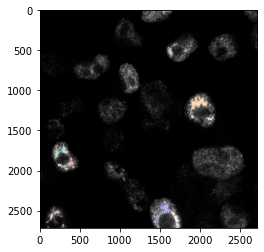

In [76]:
# segmentation automatique 6.0 (sobel)

im_color = []
for i in range (0,4):
    picture = im_gray[i]

    edges = sobel(picture)
    markers = np.zeros_like(picture)
    foreground, background = 1, 2

# réglages
##########
    if i == 0 :
        markers[picture < 50] = background
        markers[picture > 18000] = foreground

    elif i == 1 :
        markers[picture < 50000] = background
        markers[picture > 60000] = foreground

    elif i == 2 :
        markers[picture < 10000] = background
        markers[picture > 50000] = foreground

    else :
        markers[picture < 50000] = background
        markers[picture > 60000] = foreground
##########

    ws = watershed(edges, markers)
    im_color.append(label(ws == foreground))

    color1 = label2rgb(im_color[i], image=picture, bg_label=0)
    plt.imshow(color1)
    plt.show()

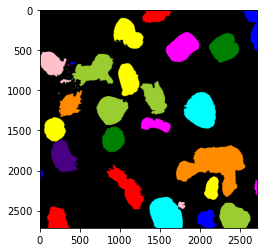

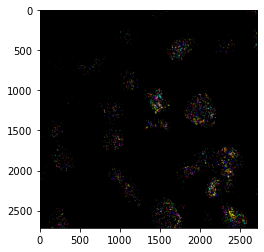

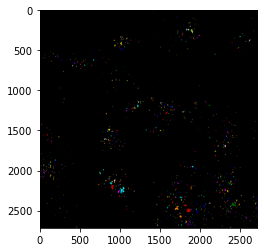

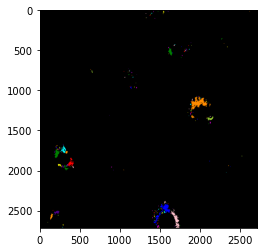

In [79]:
for i in range (0,4):
    plt.imshow(label2rgb(im_color[i], bg_label=0))
    plt.show()

In [77]:
# affichage de l'image en nuance de gris pour le seuillage
viewer = napari.view_image(im_grayscale)

In [94]:
# affichage sur napari

viewer = napari.Viewer()
for i in range (0,4) :
    a = str(i)
    viewer.add_image(im_gray[i], name='image '+a)
    viewer.add_labels(im_color[i], name='mask '+a)